In [65]:
import pandas as pd

In [66]:
import numpy as np

In [67]:
data_path  ='../input/processing/'

# TODO:
1. 将未处理的文件也读取出来，保存到pandas格式的文件中
2. 将之前处理好的数据合并到一起，用pandas来进行表示

In [10]:
# 读取processing里面的数据

In [11]:
def read_txt(path):
    with open(path, 'rt') as f:
        return f.readlines()

In [12]:
en_es_train = read_txt(data_path + 'english_train_spanish.txt')

In [13]:
en_es_train[0]

'hola ,  hago clic en el producto recibido\tcompré un producto y no he recibido un correo electrónico de confirmación\t0\n'

In [14]:
es_es_train = read_txt(data_path + 'spanish_train_spanish.txt')

In [17]:
train = pd.DataFrame(columns=['s1', 's2', 'label'])

In [18]:
s1, s2, label = [], [], []
for s in en_es_train:
    s = s.split('\t')
    s1.append(s[0])
    s2.append(s[1])
    label.append(int(s[2]))

In [19]:
for s in es_es_train:
    s = s.split('\t')
    s1.append(s[0])
    s2.append(s[1])
    label.append(int(s[2]))

In [20]:
len(s1)

21400

In [23]:
train['s1'] = s1

train['s2'] = s2
train['label'] = label

train.head()

In [24]:
train.to_csv(data_path + 'train.csv', index=False)

In [25]:
es_es_test = read_txt(data_path + 'spanish_test_spanish.txt')

In [28]:
test = pd.DataFrame(columns=['s1', 's2', 'label'])

In [29]:
s1, s2, label = [], [], []
for s in es_es_test:
    s = s.split('\t')
    s1.append(s[0])
    s2.append(s[1])
    label.append(int(s[2]))
test['s1'] = s1
test['s2'] = s2
test['label'] = label

In [31]:
test.to_csv(data_path + 'test.csv', index=False)

# 分析下训练数据的情况

In [36]:
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

print('# File sizes')
for f in os.listdir('../input/processing/'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../input/processing/' + f) / 1000000, 2)) + 'MB')

# File sizes
english_train_english.txt     1.83MB
spanish_train_english.txt     0.16MB
english_train_spanish.txt     2.09MB
test.csv                      0.58MB
train.csv                     2.27MB
spanish_train_spanish.txt     0.17MB
spanish_test_spanish.txt      0.57MB


In [46]:
train_s = pd.Series(train['s1'].tolist() + train['s2'].tolist())
test_s = pd.Series(test['s1'].tolist() + test['s2'].tolist())

/home/gjw/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mean-train 49.65 std-train 34.49 mean-test 54.38 std-test 34.17 max-train 325.00 max-test 325.00


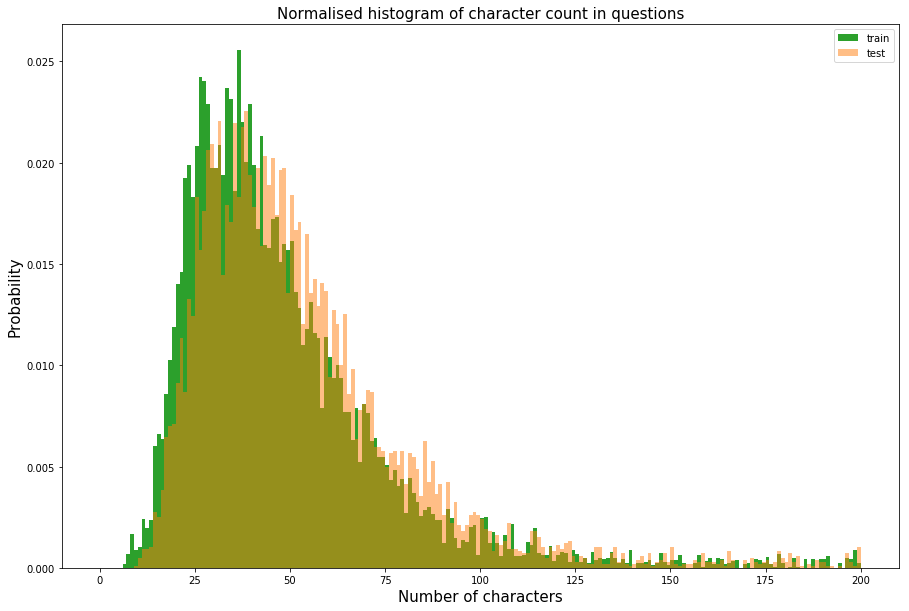

In [48]:
dist_train = train_s.apply(len)
dist_test = test_s.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

可以看出以下几点：

1. 训练集和测试集的字符长度主要是集中在40左右
2. 训练集和测试集数据长度分布相似

/home/gjw/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mean-train 10.58 std-train 7.48 mean-test 11.39 std-test 7.19 max-train 68.00 max-test 64.00


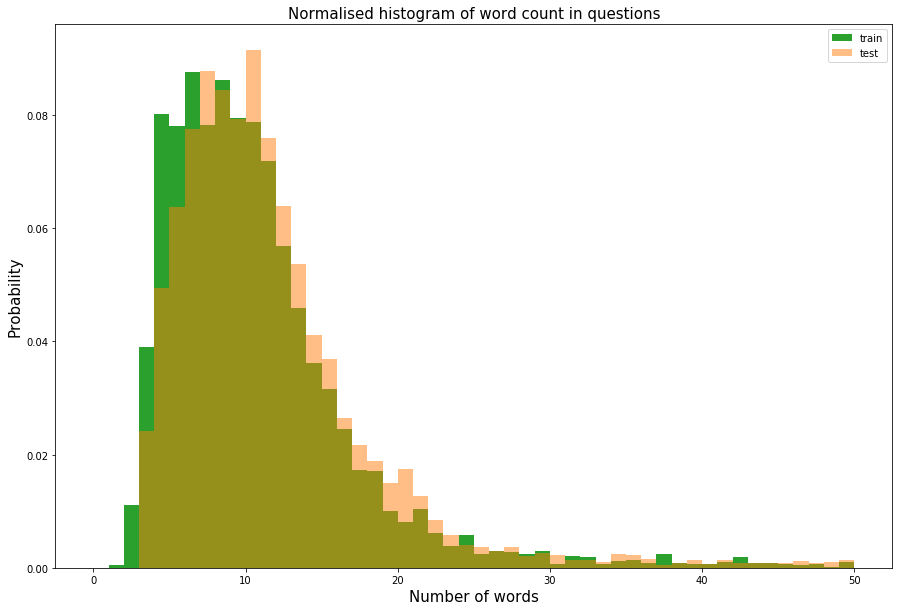

In [49]:
dist_train = train_s.apply(lambda x: len(x.split(' ')))
dist_test = test_s.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

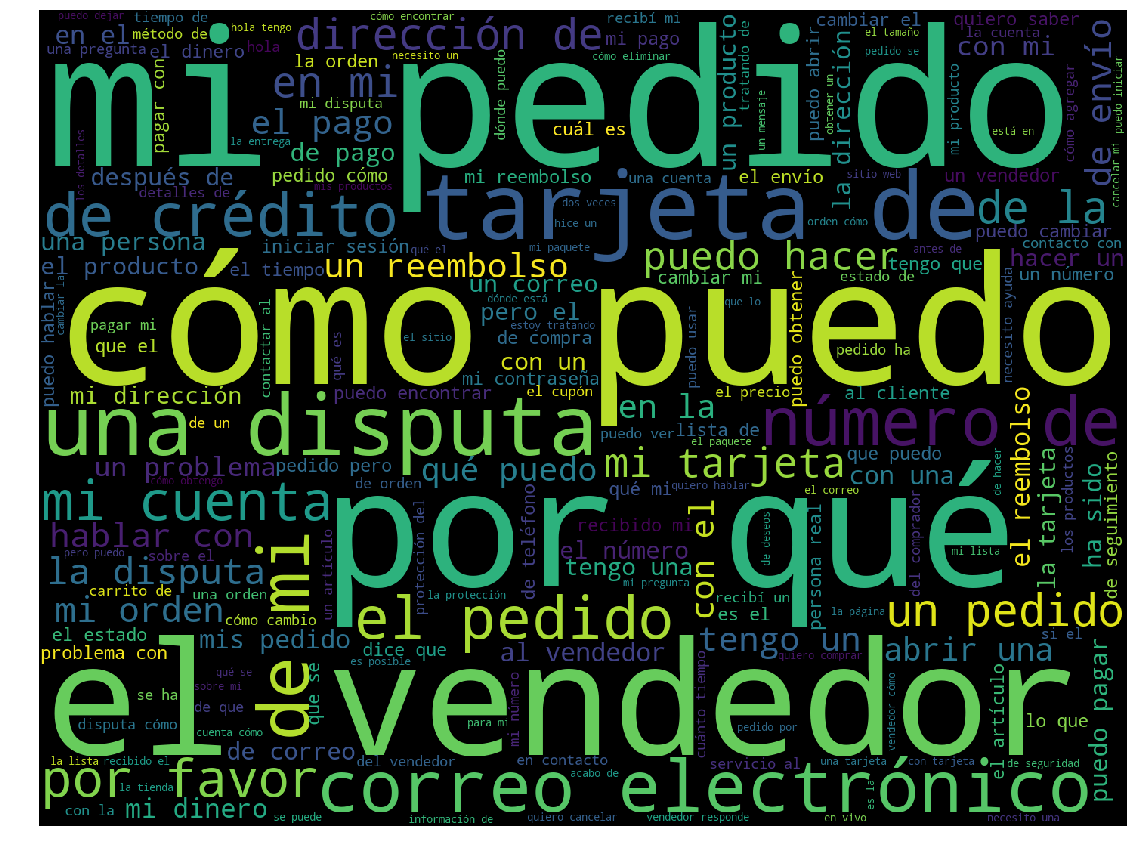

In [51]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_s.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [52]:
qmarks = np.mean(train_s.apply(lambda x: '?' in x))
math = np.mean(train_s.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_s.apply(lambda x: '.' in x))
capital_first = np.mean(train_s.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_s.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_s.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 38.98%
Questions with [math] tags: 0.00%
Questions with full stops: 14.98%
Questions with capitalised first letters: 0.00%
Questions with capital letters: 0.00%
Questions with numbers: 3.03%


In [58]:
train['label'].value_counts()

0    16097
1     5303
Name: label, dtype: int64

# 加载词向量，观察下词向量的分布情况1

In [83]:
from tqdm import tqdm
def load_embedding(embedding_file, dim=300):
    """从文件中加载现有的embedding模型"""
    embedding_dict = {}
    with open(embedding_file, 'r') as f:
        for i, line in enumerate(f):
            if i == 0:
                continue
            else:
                try:
                    line = line.strip().split()
                    word = ''.join(line[:-dim])
                    vec = np.array(line[-dim:], dtype=np.float32)
                    embedding_dict[word] = vec
                except ValueError:
                    print(line)
                    exit()
    return embedding_dict

In [84]:
embed = load_embedding('../fasttext/wiki.es.vec')